In [3]:
import os
import numpy as np

from nibabel.testing import data_path
import nibabel as nib

In [48]:
example_filename = os.path.join(data_path, '/Users/aurelien/Documents/WORK/Cours/ENSEIRB/Projet_SkullStriping/data/nifti/496/Shank_496.ibw.nii')

img = nib.load(example_filename)

img.shape

(128, 128, 128)

In [54]:
hdr = img.header

print(hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 128 128 128   0   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [  1. 156. 156. 140.   0.   0.   0.   0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [0. 0. 0. 0.]
srow_y

In [55]:
hdr.get_qform()

array([[156.,   0.,   0.,   0.],
       [  0., 156.,   0.,   0.],
       [  0.,   0., 140.,   0.],
       [  0.,   0.,   0.,   1.]])

In [56]:
hdr.get_xyzt_units()

('unknown', 'unknown')

In [57]:
hdr.set_xyzt_units(3,16)
hdr.get_xyzt_units()

('micron', 'msec')

In [58]:
print(hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 128 128 128   0   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [  1. 156. 156. 140.   0.   0.   0.   0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 19
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [0. 0. 0. 0.]
srow_

## Definition d'une fonction pour afficher des coupes

In [41]:
import matplotlib.pyplot as plt

def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

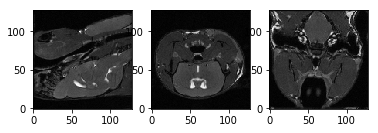

In [42]:
img_data=img.get_fdata()

slice_0 = img_data[64, :, :]
slice_1 = img_data[:, 64, :]
slice_2 = img_data[:, :, 64]
show_slices([slice_0, slice_1, slice_2])

## Sauvegarder en nifti les données

In [59]:
img.affine

array([[156.,   0.,   0.,   0.],
       [  0., 156.,   0.,   0.],
       [  0.,   0., 140.,   0.],
       [  0.,   0.,   0.,   1.]])

In [60]:
imgToSave=nib.Nifti1Pair(img_data,img.affine,hdr)
imgToSave

In [61]:
nib.save(imgToSave,'/Users/aurelien/Downloads/Shank_496_2.nii')

## Plot nifti file directly

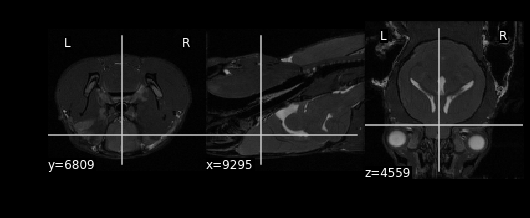

In [70]:
import nilearn
nilearn.plotting.plot_anat('/Users/aurelien/Downloads/Shank_496_2.nii')

In [75]:
img_nl = nilearn.image.load_img('/Users/aurelien/Downloads/Shank_496_2.nii')
img_nl.shape

(128, 128, 128)

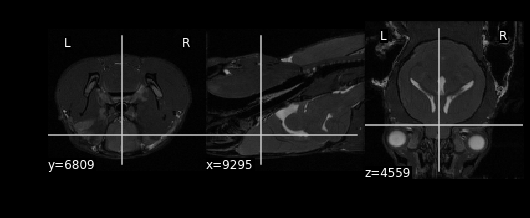

In [73]:
nilearn.plotting.plot_anat(img_nl)

In [77]:
img_resample=nilearn.image.resample_img(img_nl,img_nl.affine/2)
img_resample.shape

(255, 255, 255)

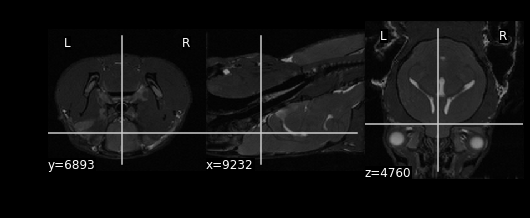

In [78]:
nilearn.plotting.plot_anat(img_resample)

## Apply bias field

In [91]:
import sys
sys.path.insert(1, '/Users/aurelien/Documents/WORK/Cours/ENSEIRB/Projet_SkullStriping/code/N4BiasFieldCorrection/')
import N4BiasFieldCorrection

In [94]:
import SimpleITK as sitk

print("N4 bias correction runs.")
inputImage = sitk.ReadImage("/Users/aurelien/Documents/WORK/Cours/ENSEIRB/Projet_SkullStriping/data/nifti_em/MetOD1_Day2.ibw.nii")
maskImage = sitk.OtsuThreshold(inputImage,0,1,500)
sitk.WriteImage(maskImage, "/Users/aurelien/Downloads/mask.nii")

inputImage = sitk.Cast(inputImage,sitk.sitkFloat32)

corrector = sitk.N4BiasFieldCorrectionImageFilter();

output = corrector.Execute(inputImage,maskImage)
sitk.WriteImage(output,"/Users/aurelien/Downloads/n4.nii")
print("Finished N4 Bias Field Correction.....")

N4 bias correction runs.
Finished N4 Bias Field Correction.....


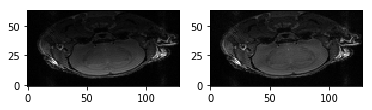

In [99]:
img_1 = nilearn.image.load_img('/Users/aurelien/Documents/WORK/Cours/ENSEIRB/Projet_SkullStriping/data/nifti_em/MetOD1_Day2.ibw.nii')
img_1_data=img_1.get_fdata()

img_2 = nilearn.image.load_img('/Users/aurelien/Downloads/n4.nii')
img_2_data=img_2.get_fdata()

slice_1 = img_1_data[:, 64, :]
slice_2 = img_2_data[:, 64, :]
show_slices([slice_1, slice_2])